In [1]:
import cv2 as cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
img = cv2.imread('/home/manik/images/messi1.jpg')

### Matplotlib takes images as rgb  whereas cv2 reads them in as bgr

In [3]:
b,g,r = cv2.split(img)

In [4]:
img2 = cv2.merge([r,g,b])

In [5]:
%matplotlib inline

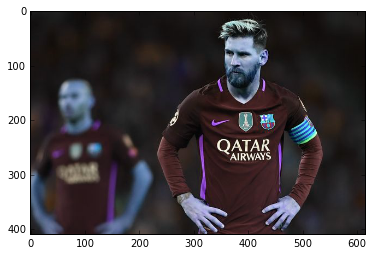

In [6]:
plt.imshow(img)
plt.show()

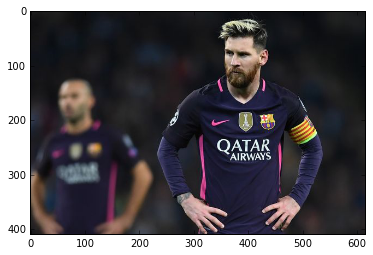

In [7]:
plt.imshow(img2)

In [8]:
cv2.imshow('messi original',img)
cv2.imshow('messi rgb',img2)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Accessing pixels of the image
### img is a 2d matrix of triplets b,g,r

In [9]:
print(img[30,30])
print(img[30,30,1]) #use item for faster access
img[30,30,1] = 28 #you can use itemset instead for faster access
print(img[30,30])
img[30,30] = [20,20,20]
print(img[30,30])

[25 23 23]
23
[25 28 23]
[20 20 20]


## Accessing properties of an image

In [10]:
print(img.shape)

(409, 615, 3)


In [11]:
print img.size

754605


In [12]:
print img.dtype #Wrong data type is a source of a large no. of errors

uint8


In [13]:
face = img[0:150,300:450]
cv2.imshow('messi_face',face)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [14]:
img[0:150,125:275] = face
cv2.imshow('messi_double_face2',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [33]:
#restoring original image
img = cv2.imread('/home/manik/images/messi1.jpg')

### super fast indexing

In [30]:
#going to change red pixels to zero
img_rz = img
img_rz[:,:,2] = 0
cv2.imshow('red zero messi',img_rz)
cv2.waitKey(0)
cv2.destroyAllWindows()
#let's see what happens on changing the blue ones
img_bz = img
img_bz[:,:,0] = 0
cv2.imshow('blue zero messi',img_bz)
cv2.waitKey(0)
cv2.destroyAllWindows()
#ofcourse now with the green ones
img_gz = img
img_gz[:,:,1] = 0
cv2.imshow('green zero messi',img_gz)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imshow('just the last one',face)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [31]:
#why am I getting a completely black screen when green values are made zero?
print img_gz
print img_rz
print img_bz
print img
#why are they all completely zero?

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ..., 
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ..., 
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ..., 
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ..., 
 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ..., 
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ..., 
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ..., 
  [0 0 0]
  [0 0 0]
  [0 0 0]]]
[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ..., 
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ..., 
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ..., 
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ..., 
 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ..., 
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ..., 
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ..., 
  [0 0 0]
  [0 0 0]
  [0 0 0]]]
[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ..., 
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ..., 
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0

## Adding border to image

In [41]:
constant = cv2.copyMakeBorder(img2,10,10,10,10,cv2.BORDER_CONSTANT,value=[255,0,0])

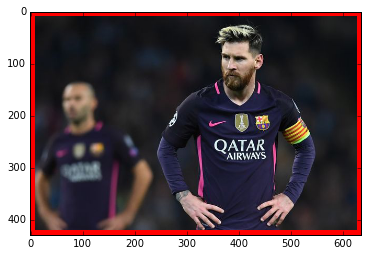

In [42]:
plt.imshow(constant)